In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (*double click to edit*):

- Name 1: Will Lacey
- Name 2: Roger Wong
- Name 3:

___

# In Class Assignment Four
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#LoadingKDD">Loading KDDCup Data</a>
* <a href="#kdd_eval">KDDCup Evaluation and Cross Validation</a>
* <a href="#data_snooping">More Cross Validation</a>
* <a href="#stats">Statistical Comparison</a>

**Before coming to class**, please make sure you have the latest version of `scikit-learn`. This notebook was created for version 0.18 and higher. 

________________________________________________________________________________________________________

<a id="LoadingKDD"></a>
<a href="#top">Back to Top</a>
## Loading KDDCup Data

Please run the following code to read in the "KDD Cup" dataset from sklearn's data loading module. It consists of examples of different simulated attacks for the 1998 DARPA Intrusion Detection System (IDS). 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [30]:
# fetch the dataset
from sklearn.datasets import  fetch_kddcup99
from sklearn import __version__ as sklearn_version
import warnings
warnings.simplefilter('ignore')

print('Sklearn Version:',sklearn_version)
ds =  fetch_kddcup99(subset='http')

Sklearn Version: 0.19.1


In [3]:
import numpy as np
# get some of the specifics of the dataset
X = ds.data
y = ds.target != b'normal.'

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 58725
n_features: 3
n_classes: 2


___
**Question 1:** How many instances are in the binary classification problem loaded above? How many instances are in each class? **Plot a pie chart or bar chart of the number of instances in each of the classes.**

Original: Number of instances in each class:
	 b'back.' - 2203
	 b'ipsweep.' - 1
	 b'normal.' - 56516
	 b'phf.' - 4
	 b'satan.' - 1

Binary: Number of instances in each class:
	 b'normal.' - 56516
	 b'abnormal.' - 2209


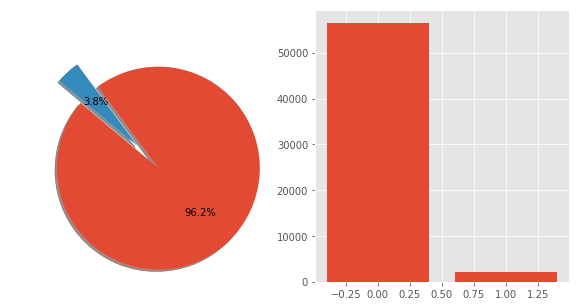

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


#=== Fill in code below========
unique, counts = np.unique(ds.target, return_counts=True)
print('Original: Number of instances in each class:')
print('\t',unique[0],'-',counts[0])
print('\t',unique[1],'-',counts[1])
print('\t',unique[2],'-',counts[2])
print('\t',unique[3],'-',counts[3])
print('\t',unique[4],'-',counts[4])
print()

plt.figure(figsize=(10, 5))
unique, counts = np.unique(y, return_counts=True)
plt.subplot(1,2,1)
plt.pie(counts, explode=(0.3,0), autopct='%1.1f%%', shadow=True, startangle=140)
plt.subplot(1,2,2)
vals = np.bincount(y)
plt.bar(range(len(vals)),vals)
print('Binary: Number of instances in each class:')
print('\t','b\'normal.\'','-',counts[0])
print('\t','b\'abnormal.\'','-',counts[1])

<a id="kdd_eval"></a>
<a href="#top">Back to Top</a>
## KDDCup Evaluation and Cross Validation

(0.9888079019073569, 1.0)

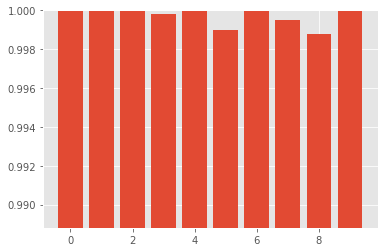

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# select model
clf = LogisticRegression()
# select cross validation
cv = KFold(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(accuracy_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 2** Is the code above a proper separation of training and testing sets for the given dataset (i.e., using KFold)? Why or why not? 



*Enter your answer here (double click)*

*Yes or No and why*

Definitely no, because the abnormal class is so much rarer than the normal class, a random split of data will be insufficient. If the classifier always guesses normal, the accuracy is already very high. We will need to use a class weighted separation.
___

**Question 3:** Is the evaluation metric chosen in the above code appropriate for the dataset (i.e., using accuracy)? Why or Why not?

*Enter your answer here (double click)*

*Yes or No and why* 

No, as mentioned previously, if the classifier merely guesses normal for all instances, it will already have a high accuracy. This is insufficient since we are mainly trying to distiguish a rare class. As a result, we will need to use a weighted classification.

___

**Exercise 1:** If the code above is not a proper separation of the train or does not use the proper evaluation criteria, fix the code in the block below to use appropriate train/test separation and appropriate evaluation criterion (criteria). **Mark changes in the code with comments.**

(0.9718181818181818, 1.0)

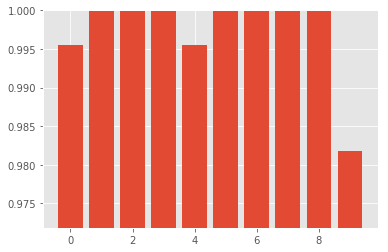

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression()
# select cross validation
cv = StratifiedKFold(n_splits=10)
# select evaluation criteria

my_scorer = make_scorer(recall_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 4**: Does the learning algorithm perform well based on the evaluation criteria? Why or why not?


*Enter you answer here (double click to edit)*

 
No, this is not performing well. Despite how recall considers TP / TP + FN and the separation of data now considers classes equally, this accuracy is still not useful. When the performance is 99.9%, the algorithm still misses about half of the abnormal cases. Since this algorithm is defending against intrusions, it must catch almost all of the threats. Missing 1/3 of them, despite the high accuracy, is simply unacceptable.

___


<a id="data_snooping"></a>
<a href="#top">Back to Top</a>

## More Cross Validation

**Exercise 2:** Does the code below contain any errors in the implementation of the cross validation? If so, fix the code below so that there are no longer any errors in the cross validation.


*Explain any cross validation errors here (double click to edit)*

(0.9718181818181818, 1.0)

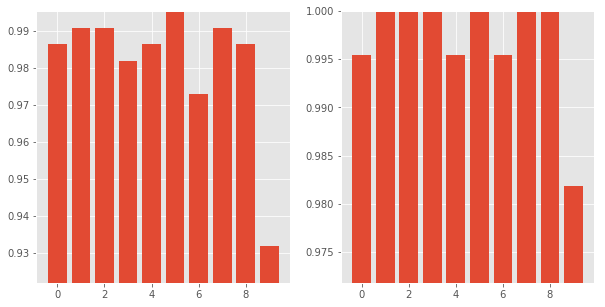

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#======If there are errors, fix them below======
n_components = 1
pca = PCA(n_components=n_components)
Xpca = pca.fit_transform(X)

clf = Pipeline([('scl',StandardScaler()),
                ('clf',LogisticRegression())])

per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=Xpca,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

# =====fixed code======
# write the fixed code (if needed) below

n_components = 2 # Better represents data
clf = Pipeline([('scl',StandardScaler()),
                ('pca',PCA(n_components=2)),
                ('clf',LogisticRegression())])

per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.subplot(1,2,2)
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

___

# Circumstances Change
For this question, the circumstances for the DARPA KDD99 cup are changed in the following way:
- When the model for detecting attacks is deployed, we now think that it will often need to be retrained because new attacks will emerge.
 - DARPA anticipates that there will be a handful of different style attacks on their systems that have never been seen before. To detect these new attacks, they are employing programmers and analysts to find them manually every day. 
 - DARPA believes the perpetrators of these new attacks are more sophisticated, so finding the new attacks will take priority over detecting the older, known attacks. 
- DARPA wants to use your learning algorithm for detecting only these new attacks. However, they tell you that the amount of training data for the new attacks will be extremely small. That is, the analysts can only identify a handful of new style attacks each day (so you will only have about 3-5 examples of the attacks for training).
- **DARPA asks you: Do you think its a good idea to employ retraining your model each day to find these new attacks?** They need an answer in the next 20 minutes.  

**Question 5**: How would you change the method of cross validation to answer this question from DARPA? That is, how can you change your cross validation method to better mirror how your system will be used and deployed by DARPA when there are only 3-5 attack examples avaliable for training? *Note: you do not have access to these new training examples. You need to change you cross validation method with the existing data to answer this question.* 

*Enter your answer here (double click)*

*We could... and why*

We could change our method of cross validation to only consider a small handful of attacks, such as 3 or 5, against a proportional amount of the rest of the data. We can mirror how our system will be deployed by using several splits, each using again a small number of attacks. This will reflect how our model will improve and react to each day as new attack/daily data comes in. The accuracy this method would need would be effectively 100%. While it might be okay to fail initially when the model has seen almost no attacks, the system should quickly be able to predict future sophisticated attacks after several splits, or days.

___

In [34]:
#plotting function for use in next question
# takes input 'test_scores', axis labels, and an x-axis label
def plot_filled(test_scores,train_x_axis, xlabel=''):
    
    test_mean = np.percentile(test_scores,50, axis=1)
    test_max = np.percentile(test_scores,95, axis=1) 
    test_min = np.percentile(test_scores,5, axis=1) 

    plt.plot(train_x_axis, test_mean,
             color='blue', linestyle='--',
             marker='s', markersize=5,
             label='validation set')

    plt.fill_between(train_x_axis,
                     test_min,
                     test_max,
                     alpha=0.15, color='blue')

    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel('Evaluation Criterion')
    plt.legend(loc='lower right')
    plt.tight_layout()

___
DARPA is also concerned about how much training data they will need from the analysts in order to have a high performing model. They would like to use the current dataset to help answer that question. The code below is written for you to help answer DARPA's question about how many examples will be needed for training. Examine the code and the output that is already run for you, then answer the following question:

**Question 6**: Based on the analysis graphed below, how many positive examples are required to have a good tradeoff between bias and variance for the given evaluation criteria? Why? *Note: the x-axis really is a percentage, so the value 0.1 is actually 0.1%.*

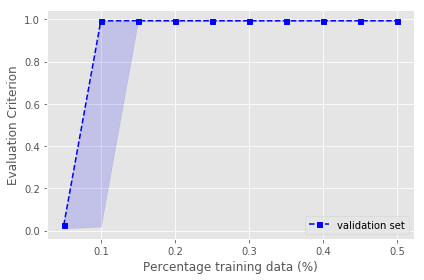

In [36]:
clf = LogisticRegression()

test_scores = []
train_sizes=np.linspace(5e-4,5e-3,10)

for size in train_sizes:
    cv = StratifiedShuffleSplit(n_splits=100,
                                train_size = size,
                                test_size = 1-size,
                               )
    test_scores.append(cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=my_scorer))

plot_filled(np.array(test_scores), train_sizes*100, 'Percentage training data (%)')

___
*Enter you answer here (double click)*

*It seems that ...*

The model works very well after seeing only several attacks. This proves that the model is capable of learning quickly, responding to new attacks very well. However, this doesn't necessarily prove that future attacks are guaranteed to be caught by the classifier, but that there is a good trade off between bias and variance after seeing 0.2%.

___

___
<a id="stats"></a>
<a href="#top">Back to Top</a>

# Statistical Comparison
Now lets create a few different models and see if any of them have statistically better performances. 

We are creating three different classifiers below to compare to one another. For creating different training and testing splits, we are using stratified shuffle splits on the datasets. 



In [37]:
clf1 = LogisticRegression(C=100)
clf2 = LogisticRegression(C=1)
clf3 = LogisticRegression(C=0.1)

train_size = 0.003 # small training size
cv = StratifiedShuffleSplit(n_splits=10,train_size=train_size,test_size=1-train_size)

evals1 = cross_val_score(estimator=clf1,X=X,y=y,scoring=my_scorer,cv=cv)
evals2 = cross_val_score(estimator=clf2,X=X,y=y,scoring=my_scorer,cv=cv)
evals3 = cross_val_score(estimator=clf3,X=X,y=y,scoring=my_scorer,cv=cv)

**Question 7**: Given the code above, what statistical test is more appropriate for selecting confidence intervals, and **why**? Your options are:
- **A**: approximating the evaluation criterion as a binomial distribution and bounding by the variance (the first option we used in the flipped lecture video)
- **B**: approximating the bounds using the folds of the cross validation to get mean and variance (the second option we used in the flipped lecture video)
- **C**: Either are acceptable statistical tests for obtaining confidence intervals

*Enter you answer here (double click)*

*The reason that I think (A or B or C) is correct is because...*

B. Option B considers the cross validation of the data and thus maintains an appropriate separation of training and testing data. Once the variance and mean is calculated the confidence interval can then be computed.

___

___
**Final Exercise:** With 95% confidence, perform the statistical test that you selected above. Is any model or set of models statistically the best performer(s)? Or can we not say if the models are different with greater than 95% confidence?

If you chose option A, use a multiplier of Z=1.96. The number of instances used in testing can be calculated from the variable `train_size`.

If you chose option B, use a multiplier of t=2.26 and k=10.

(0.005440508628519528, 0.024977293369663943)

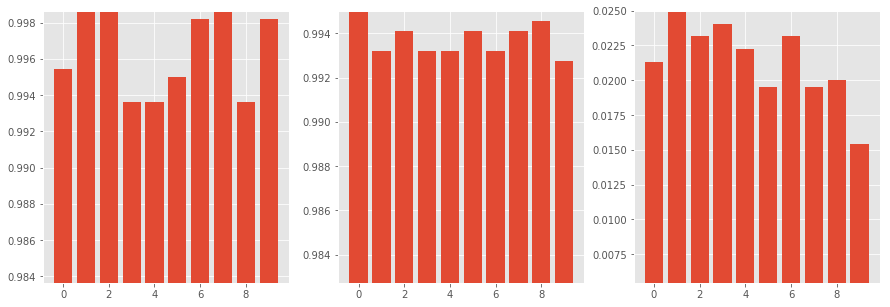

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.bar(range(len(evals1)),evals1)
plt.ylim([min(evals1)-0.01,max(evals1)])

plt.subplot(1,3,2)
plt.bar(range(len(evals2)),evals2)
plt.ylim([min(evals2)-0.01,max(evals2)])

plt.subplot(1,3,3)
plt.bar(range(len(evals3)),evals3)
plt.ylim([min(evals3)-0.01,max(evals3)])

In [49]:
#===================================================
# Enter your code below

def confidence_interval(evals, t, k):
    dbar = np.mean(evals)
    temp = [(dbar-evals[j])**2 for j in range(k)]
    variance = (1/(k-1))*np.sum(temp)
    error = (1 / (k ** 0.5) ) * t * (variance ** 0.5)
    return dbar-error, dbar+error
    
print('eval1:',confidence_interval(evals1, t=2.26, k=10))
print('eval2:',confidence_interval(evals2, t=2.26, k=10))
print('eval3:',confidence_interval(evals3, t=2.26, k=10))

print('With a confidence of 95%, eval1 is statistically the best performer')
print('\tsince it\'s confidence interval is greater than the other two.')
#===================================================

eval1: (0.9947333708608497, 0.9980005074316118)
eval2: (0.9932074057102579, 0.9942585343442382)
eval3: (0.0193318621226844, 0.02335660290910489)
With a confidence of 95%, eval1 is statistically the best performer
	since it's confidence interval is greater than the other two.


________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.